# Stock Price- Problem #1

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from math import log

In [2]:
#loading data
data=pd.read_csv('Assignment2.csv',sep='\t')
data

,SpringPos,StockPrice
0,2.27,3.48
1,6.38,2.99
2,8.61,5.86
3,8.65,1.79
4,13.17,3.47
...,...,...
221,1.37,25.14
222,2.29,22.65
223,1.80,21.04
224,0.82,20.98


In [3]:
data.describe()

,SpringPos,StockPrice
count,226.000000,226.000000
mean,3.785221,14.187743
std,10.704778,7.447450
min,-19.910000,0.670000
25%,-3.960000,8.355000
50%,4.195000,13.970000
75%,11.295000,19.632500
max,26.100000,30.050000


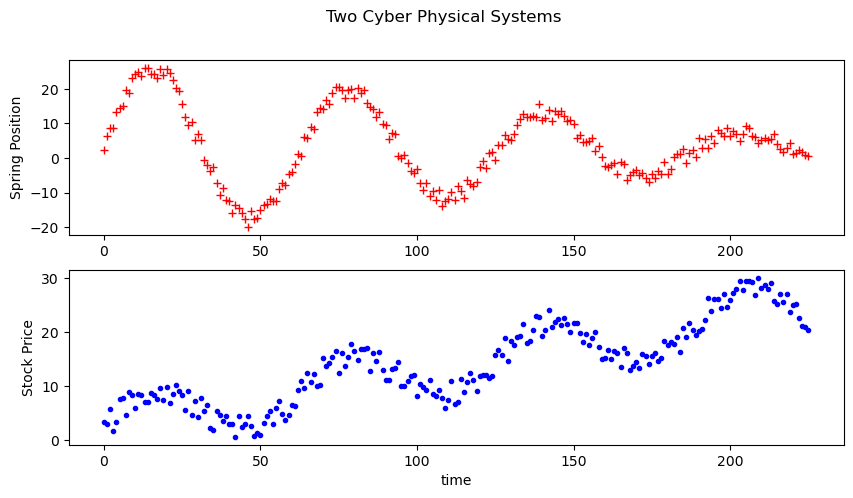

In [4]:
#both waveforms are periodic in nature
#We can assume exponential decay but for convenience we will take linear decay
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Two Cyber Physical Systems')
fig.set_figwidth(10)
fig.set_figheight(5)

ax1.plot(data.SpringPos, 'r+')
ax1.set_ylabel('Spring Position')
ax2.plot(data.StockPrice, 'b.')
ax2.set_ylabel('Stock Price')
ax2.set_xlabel('time')

plt.show()

# TASK 1

In [5]:
y2 = pd.DataFrame({"x":range(226), "y":data.StockPrice})
y2.head()

,x,y
0,0,3.48
1,1,2.99
2,2,5.86
3,3,1.79
4,4,3.47


In [6]:
yy = np.array(y2.y)
xx = np.expand_dims(y2.x, 1)

In [7]:
def estimateBeta(X, y):
    numerator = np.matmul(np.transpose(X), y)
    denom = np.matmul(np.transpose(X), X)
    denom_inv = np.linalg.inv(denom)
    beta = np.matmul(denom_inv, numerator)
    return beta

# create a helper that would estimate yhat from X and beta.
def predict(beta, X):
    # reshape the input to a matrix, if it is appearing like an 1d array.
    if len(X.shape) != 2:
        X = np.expand_dims(X,1)
    # convert the beta list in to an array.
    beta = np.array(beta)
    # perform estimation of yhat.
    return np.matmul(X, beta)

# compute the sum of squared error between y and yhat.
def SSE(y, yhat):
    return np.sum((y-yhat)**2)

In [8]:
numerator = np.matmul(np.transpose(xx), yy)
denom = np.matmul(np.transpose(xx), xx)
denom_inv = np.linalg.inv(denom)
beta = np.matmul(denom_inv, numerator)
print("Beta = ", beta[0])

sse = np.sum((xx*beta[0] - np.expand_dims(yy,1))**2)
print("SSE = ", sse)
#so for OLS SSE=3850

Beta =  0.11899412514961835
SSE =  3850.3354330802345


Text(0.5, 0, 'Time')

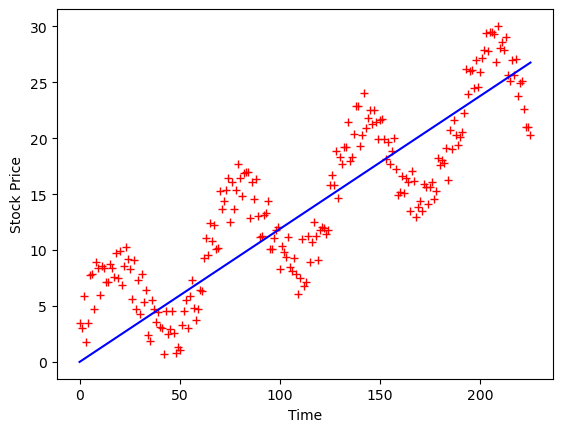

In [9]:
plt.plot(y2.x, y2.y, 'r+')
yhat1 = predict(beta, y2.x)
plt.plot(y2.x, yhat1, 'b-')  # yhat = y2.x*beta[0]
plt.ylabel('Stock Price')
plt.xlabel('Time')

<span style="font-size:1.5em;">
Linear Search for m=tan(theta) </span>

In [10]:
thetas = np.arange(0, 61, 5)  # Angles in degrees
ms = np.tan(np.deg2rad(thetas))  # Convert angles to radians and calculate tangents
ms

array([0.        , 0.08748866, 0.17632698, 0.26794919, 0.36397023,
       0.46630766, 0.57735027, 0.70020754, 0.83909963, 1.        ,
       1.19175359, 1.42814801, 1.73205081])

In [11]:
sse_tan=[]
for i in range(len(ms)):
    yhat = predict(np.array([ms[i]]), xx)
    sse=SSE(yy, yhat)
    sse_tan.append(sse)
    print('SSE for theta ',thetas[i],'=',sse)


SSE for theta  0 = 57971.5195
SSE for theta  5 = 7644.253463286041
SSE for theta  10 = 16414.204300757367
SSE for theta  15 = 88656.38097289258
SSE for theta  20 = 233234.64823709434
SSE for theta  25 = 464912.6864159496
SSE for theta  30 = 806862.9417290995
SSE for theta  35 = 1295032.4609382832
SSE for theta  40 = 1985872.5235785348
SSE for theta  45 = 2970551.8794999984
SSE for theta  50 = 4402516.076549392
SSE for theta  55 = 6554700.170409569
SSE for theta  60 = 9949095.786187291


In [12]:
sse_tan=[float(i) for i in sse_tan]
sse_tan=[round(elem,3) for elem in sse_tan]

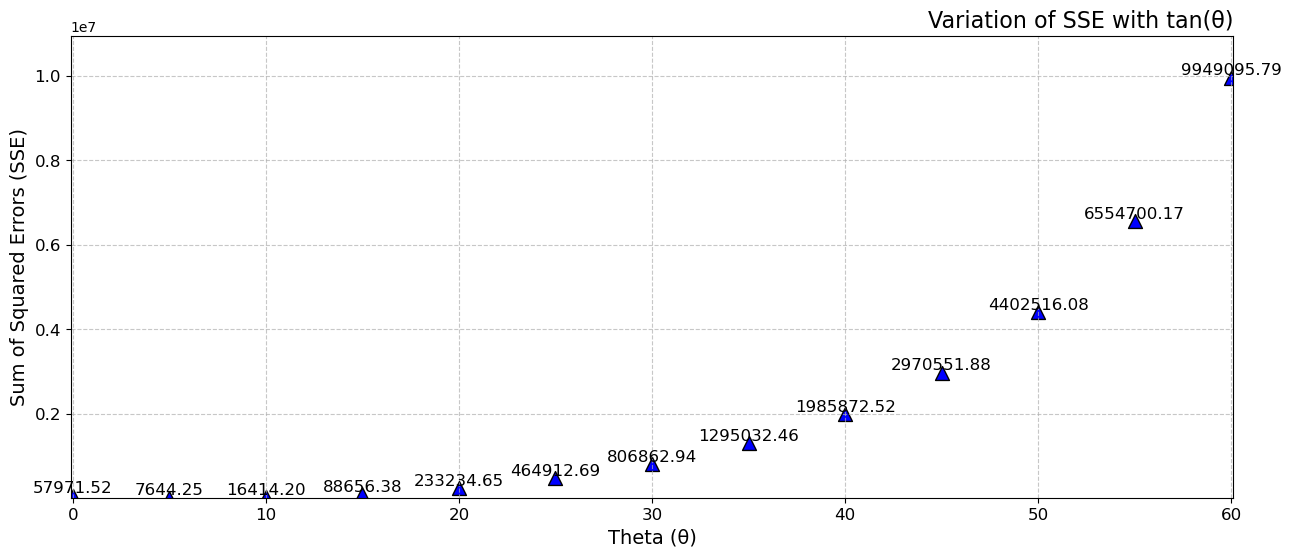

In [13]:
plt.figure(figsize=(15,6))
plt.title("Variation of SSE with tan(θ)", fontsize=16, loc='right')
plt.xlabel("Theta (θ)", fontsize=14)
plt.ylabel("Sum of Squared Errors (SSE)", fontsize=14)
plt.scatter(thetas, sse_tan, marker='^', color='blue', s=100, edgecolor='black')
for i, txt in enumerate(sse_tan):
    plt.annotate(f'{txt:.2f}', (thetas[i], sse_tan[i]), fontsize=12, ha='center', va='bottom')
plt.grid(True, linestyle='--', alpha=0.7)

plt.xlim(min(thetas) - 0.1, max(thetas) + 0.1)
plt.ylim(min(sse_tan) - 0.1 * min(sse_tan), max(sse_tan) + 0.1 * max(sse_tan))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


<span style="font-size:1.5em;">
SO, the minimum value of SSE is for theta=5 (slope/tan(theta)=0.08748866) which is equal to 7644.25  </span>

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(xx, yy)
reg_noint=LinearRegression(fit_intercept=False).fit(xx, yy)

In [15]:
reg.intercept_

3.182447857783318

In [16]:
reg_noint.intercept_

0.0

In [17]:
#checking value of slope
reg_noint.coef_[0]

0.11899412514961832

In [18]:
sse2=SSE(xx*reg_noint.coef_[0],np.expand_dims(yy,1))
sse2

3850.335433080235

<span style="font-size:1.5em;">

So, slope for OLS and SKLearn Linear Regression is same (0.1189) with same error values (3850) while for tan(theta) it's different and gives almost double the error (7644) of other two cases. This is because we are taking thetas in steps of 5. From the trend of SSE values, assuming no abnomalies, we can say that the best theta would probably lie between 5 and 10.
</span>

# TASK 2

Adding intercept to see if SSE drops

In [19]:
y2= pd.DataFrame({"bias":np.ones(226), "x":range(226), "y":data.StockPrice})
y_2 = np.array(y2.y)
x_2 = np.array(y2[["bias","x"]])
y2.head()

,bias,x,y
0,1.0,0,3.48
1,1.0,1,2.99
2,1.0,2,5.86
3,1.0,3,1.79
4,1.0,4,3.47


In [20]:
x_2.shape

(226, 2)

In [21]:
beta2 = estimateBeta(x_2, y_2)
print("beta =", beta2)
yhat2 = predict(beta2, x_2)
loss = SSE(y_2, yhat2)
print("SSE =", loss)

beta = [3.18244786 0.09782485]
SSE = 3274.298469663405


In [22]:
#Loss has reduced. Now we will add sine function and continue with intercept as 1.

Text(0.5, 0, 'Time')

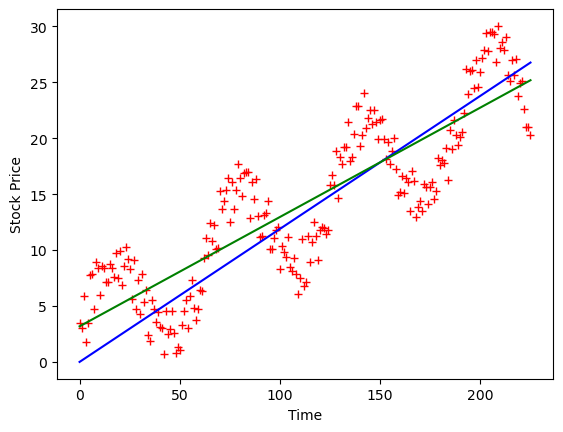

In [23]:
plt.plot(y2.x, y2.y, 'r+')
plt.plot(y2.x, yhat1, 'b-')
plt.plot(y2.x, yhat2, 'g-')
plt.ylabel('Stock Price')
plt.xlabel('Time')

In [24]:
x1 = round(y2.x*beta2[1],2)
x2 = np.sin(x1)
y_p = pd.DataFrame({"bias":np.ones(226),"x":range(226), "x1":x1, "x2":x2, "y":data.StockPrice})
y_p.head(10)

,bias,x,x1,x2,y
0,1.0,0,0.00,0.000000,3.48
1,1.0,1,0.10,0.099833,2.99
2,1.0,2,0.20,0.198669,5.86
3,1.0,3,0.29,0.285952,1.79
4,1.0,4,0.39,0.380188,3.47
5,1.0,5,0.49,0.470626,7.73
6,1.0,6,0.59,0.556361,7.83
7,1.0,7,0.68,0.628793,4.70
8,1.0,8,0.78,0.703279,8.97
9,1.0,9,0.88,0.770739,8.43


In [25]:
x_p = np.array(y_p[['bias', 'x1', 'x2']])
y_p = np.array(y_p.y)

In [26]:
beta3 = estimateBeta(x_p, y_p)
print("Beta = ", beta3)
yhat3 = predict(beta3, x_p)
loss = SSE(y_p, yhat3) #np.sum((np.matmul(xx,beta) - yy)**2)
print("SSE = ", loss)

Beta =  [2.74436632 1.00020159 4.82388129]
SSE =  701.3625743495966


<span style="font-size:1.5em;">
After adding sine element, SSE has come down to 701 from 3274 </span>

Text(0.5, 0, 'Time')

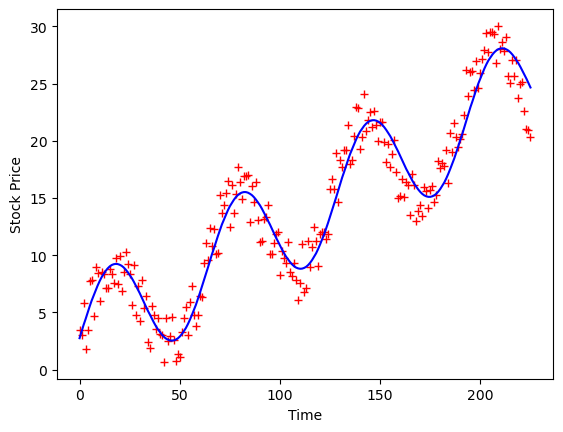

In [27]:
plt.plot(y2.x, y2.y, 'r+')
plt.plot(y2.x, yhat3, 'b-')
plt.ylabel('Stock Price')
plt.xlabel('Time')

In [28]:
len(x_p)

226

<span style="font-size:1.2em;">
For interpolation, we use test train split to randomly split data into 3 parts. Then we train on 60% of the data, evaluate on 20% and test on the remaining 20%.  </span>

In [29]:
#INTERPOLATION
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(x_p, y_p, test_size=0.4, random_state=19)
X_eval,X_test, y_eval, y_test=train_test_split(X_temp, y_temp, test_size=0.5, random_state=29)

In [30]:
model_in = estimateBeta(X_train, y_train)
y_evalp = predict(model_in, X_eval)
y_pred=predict(model_in,X_test)


In [31]:
#CHECKING ACCURACY MEASURES FOR TRAINING SET
error = SSE(y_eval, y_evalp)
print("The SSE of interpolation model on evaluation data is: ",error)
from sklearn.metrics import r2_score
score1 = r2_score(y_eval, y_evalp)
print("The R sq of the interpolation model on evaluation data is {}".format(round(score1, 2) ))

The SSE of interpolation model on evaluation data is:  162.15391027226764
The R sq of the interpolation model on evaluation data is 0.93


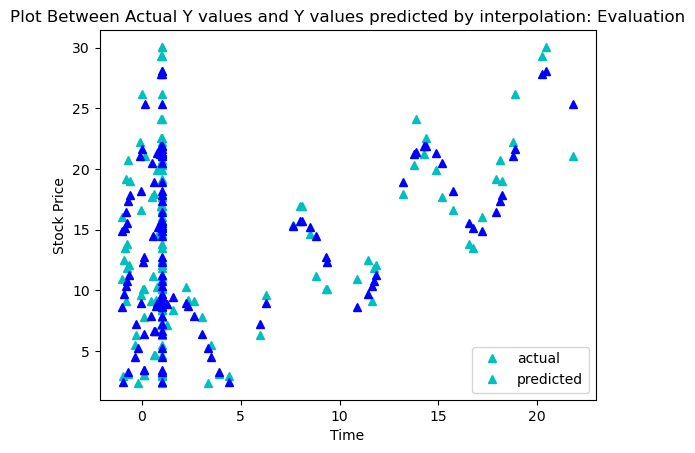

In [32]:
plt.title('Plot Between Actual Y values and Y values predicted by interpolation: Evaluation')
plt.plot(X_eval, y_eval,'c^')
plt.plot(X_eval, y_evalp,'b^')
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.legend(('actual','predicted'))

In [33]:
error = SSE(y_test, y_pred)
print("The SSE of interpolation model on test data is: ",error)
score = r2_score(y_test, y_pred)
print("The R sq of the interpolation model is {}".format(round(score, 2) ))

The SSE of interpolation model on test data is:  146.7100298448245
The R sq of the interpolation model is 0.95


<span style="font-size:1.5em;"> Plot Between Actual Y test values and Y test values predicted by interpolation
  </span>

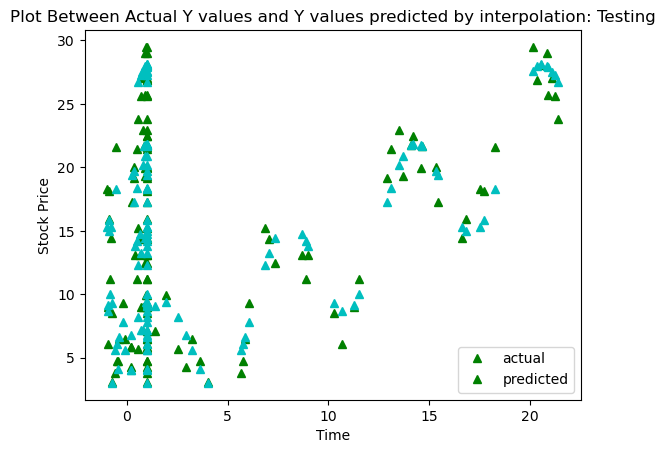

In [34]:
plt.title('Plot Between Actual Y values and Y values predicted by interpolation: Testing')
plt.plot(X_test, y_test,'g^')
plt.plot(X_test, y_pred,'c^')
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.legend(('actual','predicted'))

<span style="font-size:1.2em;">
For extrapolation, we use initial 60% of the data for training, next 20% for evaluation and remaining 20% for testing.  </span>

In [35]:
#EXTRAPOLATION
x_train_ext=x_p[:int((0.6)*len(x_p))]
y_train_ext=y_p[:int((0.6)*len(y_p))]

x_eval_ext=x_p[int((0.6)*len(x_p)):int((0.8)*len(x_p))]
y_eval_ext=y_p[int((0.6)*len(y_p)):int((0.8)*len(y_p))]

x_test_ext=x_p[int((0.8)*len(x_p)):]
y_test_ext=y_p[int((0.8)*len(y_p)):]

In [36]:
model_ex= LinearRegression().fit(x_train_ext, y_train_ext)

In [37]:
y_evalp_ext=model_ex.predict(x_eval_ext)
y_pred_ext=model_ex.predict(x_test_ext)

In [38]:
#CHECKING ACCURACY MEASURES FOR EVALUATION SET
error = SSE(y_eval_ext, y_evalp_ext)
print("The SSE of extrapolation model on evaluation data is: ",error)
from sklearn.metrics import r2_score
score1 = r2_score(y_eval_ext, y_evalp_ext)
print("The R sq of the extrapolation model on evaluation data is {}%".format(round(score1, 2) *100))

The SSE of extrapolation model on evaluation data is:  209.17722863976033
The R sq of the extrapolation model on evaluation data is 49.0%


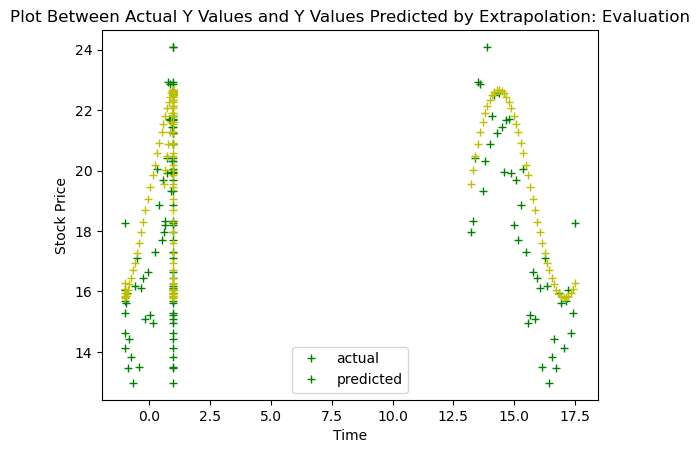

In [39]:
plt.title('Plot Between Actual Y Values and Y Values Predicted by Extrapolation: Evaluation')
plt.plot(x_eval_ext, y_eval_ext,'g+')
plt.plot(x_eval_ext, y_evalp_ext,'y+')
plt.legend(('actual','predicted'))
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.show()

In [40]:
#CHECKING ACCURACY MEASURES FOR TEST SET
error = SSE(y_test_ext, y_pred_ext)
print("The SSE of extrapolation model on test data is: ",error)
from sklearn.metrics import r2_score
score1 = r2_score(y_test_ext, y_pred_ext)
print("The R sq of the extrapolation model on test data is {}%".format(round(score1, 2) *100))

The SSE of extrapolation model on test data is:  246.3218076840316
The R sq of the extrapolation model on test data is 63.0%


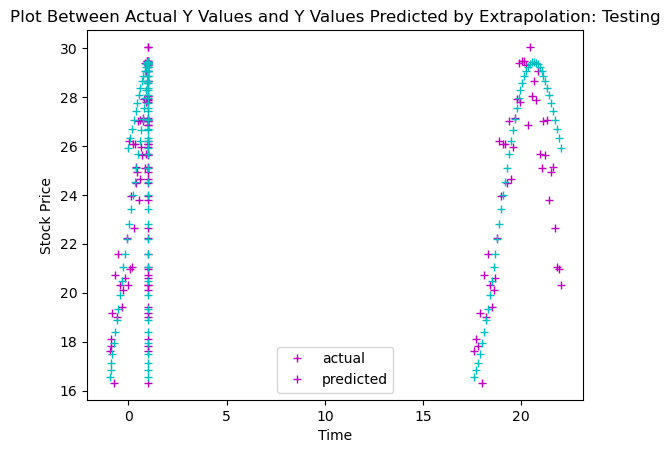

In [41]:
plt.title('Plot Between Actual Y Values and Y Values Predicted by Extrapolation: Testing')
legends=('actual','predicted')
plt.plot(x_test_ext, y_test_ext,'m+')
plt.plot(x_test_ext, y_pred_ext,'c+')
plt.legend(('actual','predicted'))
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.show()


<span style="font-size:1.1em;">    
    
Our model works better for interpolation (sse_test & sse_eval <200 ) as compared to extrapolation (sse_test & sse_eval> 200).
</span>

# TASK 3: Problem#2 Spring Position

In [42]:
data

,SpringPos,StockPrice
0,2.27,3.48
1,6.38,2.99
2,8.61,5.86
3,8.65,1.79
4,13.17,3.47
...,...,...
221,1.37,25.14
222,2.29,22.65
223,1.80,21.04
224,0.82,20.98


In [43]:
ys = pd.DataFrame({"x":range(226), "y":data.SpringPos})
ys.head()

,x,y
0,0,2.27
1,1,6.38
2,2,8.61
3,3,8.65
4,4,13.17


In [44]:
sy = np.array(ys.y)
sx = np.array(ys.x)
sy.shape

(226,)

In [45]:
numerator = np.matmul(np.transpose(np.expand_dims(sx,1)), sy)
denom = np.matmul(np.transpose(np.expand_dims(sx,1)), (np.expand_dims(sx,1)))
denom_inv = np.linalg.inv(denom)
beta = np.matmul(denom_inv, numerator)
print("Beta = ", beta[0])
sse = np.sum(((np.expand_dims(sx,1))*beta[0] - np.expand_dims(sy,1))**2)
print("SSE = ", sse)

Beta =  0.018321754998724567
SSE =  27738.298279267474


<span style="font-size:1.5em;"> So the value of beta after fitting on y=beta*x is 0.018 and SSE is 27738. This uses OLS fitting. 
  </span>

In [46]:
springmodel=LinearRegression().fit(np.expand_dims(sx,1),sy)
coef=springmodel.coef_

In [47]:
coef

array([-0.02724716])

In [48]:
inter=springmodel.intercept_

In [49]:
error = SSE(sx*coef+inter,np.expand_dims(sy,1))
error

5988411.067941709

<span style="font-size:1.5em;"> Using inbuilt linear regression from sklearn gives a huge error. 
  </span>

<span style="font-size:1.3em;"> Now, we will try to model the non-linear nature of the curve which resembles damped sinusoidal oscillations. It can be exponentially damped or linear damped, but since exponential is not a linear function, we will model using linear damping represented as y(x)=A*(1-x/k)*sin(bx)+ C. Here, damping of amplitude is taken into account by the term (1-x/k) which will reduce the amplitude as value of x (time) increases.


  </span>

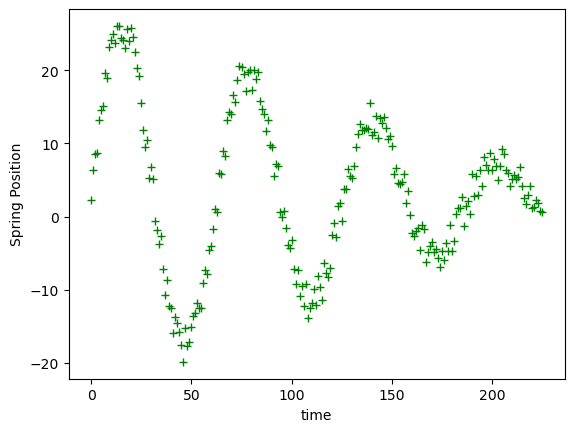

In [50]:
plt.plot(data.SpringPos, 'g+')
plt.ylabel('Spring Position')
plt.xlabel('time')
plt.show()

<span style="font-size:1.1em;">    
    
The graph shows a sinusoidal pattern with constant time period. We observe approximately three and a half full cycles of this wave on the graph. Given that a standard sine function completes one cycle in 2π units, our data covers a range equivalent to 7π units. To align our estimated sine curve with the observed data, we need to adjust the scale. Since the maximum value in our data is 225, multiplying our data by approximately 0.1 (or 7π/225) will transform this peak to 7π, matching the scale of the sine function. This means that we can take sin(bx)~sin(0.1x)

</span>

<span style="font-size:1.1em;">    
    
So now our equation is:
y(x)=A*(1-x/k)*sin(0.1x)+C
we will run gradient descent to estimate the best values of A (amplitude) and k (damping factor) which minimiz the SSE value.

</span>

In [51]:
import numpy as np

def pred(x, a, k, c):
    return a * (1 - x / k) * np.sin(0.1*x) + c

def loss(y_pred, y):
    return np.sum((y_pred - y)**2)

def d_loss_da(y_pred, y, x, k):
    return 2 * np.sum((y_pred - y) * (1 - x / k) * np.sin(0.1*x))

def d_loss_dk(y_pred, y, x, a, k):
    return 2 * np.sum((y_pred - y) * a * x / k**2 * np.sin(0.1*x))

def d_loss_dc(y_pred, y):
    return 2 * np.sum(y_pred - y)  # Derivative of loss with respect to c

def gradient_descent(x, y, a_init, k_init, c_init, learning_rate, num_iterations):
    a = a_init
    k = k_init
    c = c_init
    for i in range(num_iterations):
        y_pred = pred(x, a, k, c)
        loss_val = loss(y_pred, y)
        da = d_loss_da(y_pred, y, x, k)
        dk = d_loss_dk(y_pred, y, x, a, k)
        dc = d_loss_dc(y_pred, y)
        a -= learning_rate * da
        k -= learning_rate * dk
        c -= learning_rate * dc
    return a, k, c

In [52]:
a_init = 1.0
k_init = 2.0
learning_rate = 0.001
c=1.0
num_iterations = 10000 #initializing values

optimal_a, optimal_k, optimal_c = gradient_descent(sx, sy, a_init, k_init, c, learning_rate, num_iterations)

In [53]:
optimal_a

24.914471892412887

In [54]:
optimal_k

248.83746883236876

In [55]:
optimal_c

2.5725526389563136

In [56]:
ypred=pred(sx, optimal_a, optimal_k, optimal_c)
SSE(ypred,sy)

464.60957315046926

<span style="font-size:1.3em;">    
    
The optimal values of A, k and C are 24.91, 248.84 and 2.57 respectively. These parameters give an SSE of 464.61.

</span>

<span style="font-size:1.1em;">    
    
PLOT OF PREDICTED SPRING POSITION VS ACTUAL SPRING POSITION.
</span>

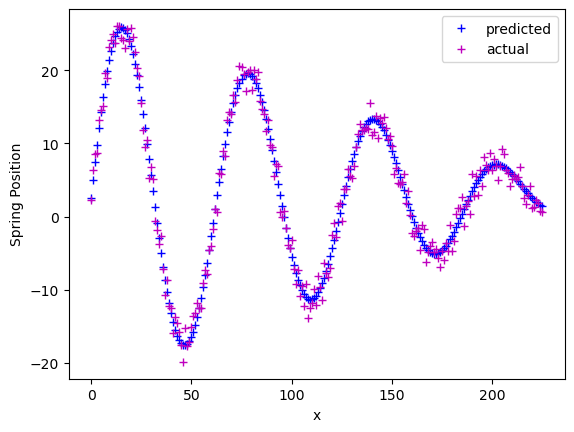

In [57]:
plt.plot(sx,ypred,'b+')
plt.plot(sx,sy,'m+')
plt.xlabel('x')
plt.ylabel('Spring Position')
plt.legend(('predicted','actual'))

# Mathematical Model: y(x)= 25*(1-(x/250))*sin(0.1x) + 2.57


# SSE= 464.60

In [58]:
sx_df=pd.DataFrame([sx])
sx_df=sx_df.T

<span style="font-size:1.1em;">    
    
Dividing into training, evaluation and tsting data and repeating interpolation and extrapolation like we did in Task 2.
</span>

In [59]:
#INTERPOLATION
X_tr, X_te, y_tr, y_te= train_test_split(sx_df, sy, test_size=0.4, random_state=19)
X_ev,X_tst, y_ev, y_tst=train_test_split(X_te, y_te, test_size=0.5, random_state=29)

In [60]:
X_tr

,0
0,0
131,131
136,136
175,175
174,174
...,...
19,19
168,168
98,98
110,110


In [61]:
a_init = 1.0
k_init = 2.0
c=1.0
learning_rate = 0.001
num_iterations = 10000

optimal_a, optimal_k, optimal_c = gradient_descent(X_tr[0], y_tr, a_init, k_init, c, learning_rate, num_iterations)

In [62]:
optimal_a,optimal_k, optimal_c

(24.695247780974903, 248.39524064142603, 2.5717302481944277)

In [63]:
y_ev_pred=pred(X_ev[0], optimal_a, optimal_k, optimal_c)

In [64]:
SSE(y_ev_pred,y_ev)

84.8699956415614

In [65]:
y_tst_pred=pred(X_tst[0], optimal_a, optimal_k, optimal_c)
SSE(y_tst,y_tst_pred)

88.90283130773832

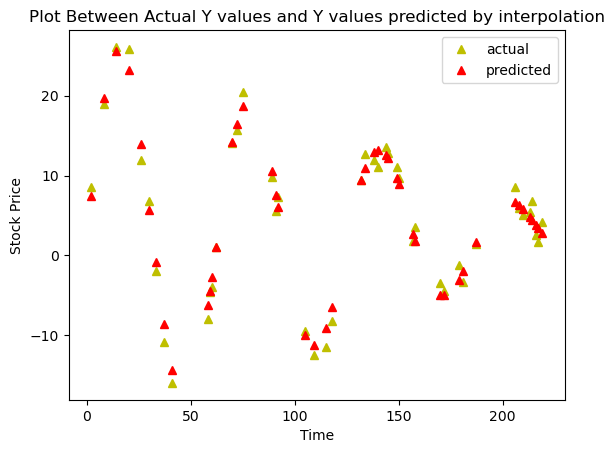

In [66]:
plt.title('Plot Between Actual Y values and Y values predicted by interpolation')
plt.plot(X_tst, y_tst,'y^')
plt.plot(X_tst, y_tst_pred,'r^')
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.legend(('actual','predicted'))

In [67]:
#EXTRAPOLATION
x_tr=sx_df[:int((0.6)*len(sx_df))]
y_tr_sl=sy[:int((0.6)*len(sy))]

x_eval_sl=sx_df[int((0.6)*len(sx_df)):int((0.8)*len(sx_df))]
y_eval_sl=sy[int((0.6)*len(sy)):int((0.8)*len(sy))]

x_test_sl=sx_df[int((0.8)*len(sx)):]
y_test_sl=sy[int((0.8)*len(sy)):]


In [68]:
a_init = 1.0
k_init = 2.0
c=1
learning_rate = 0.001
num_iterations = 10000

optimal_a, optimal_k, optimal_c = gradient_descent(x_tr[0], y_tr_sl, a_init, k_init, c, learning_rate, num_iterations)

optimal_a,optimal_k

(25.959225898489994, 219.30050357186138)

In [69]:
y_test_pred=pred(x_test_sl[0], optimal_a, optimal_k, optimal_c)
SSE(y_test_sl,y_test_pred)


236.82704805615595

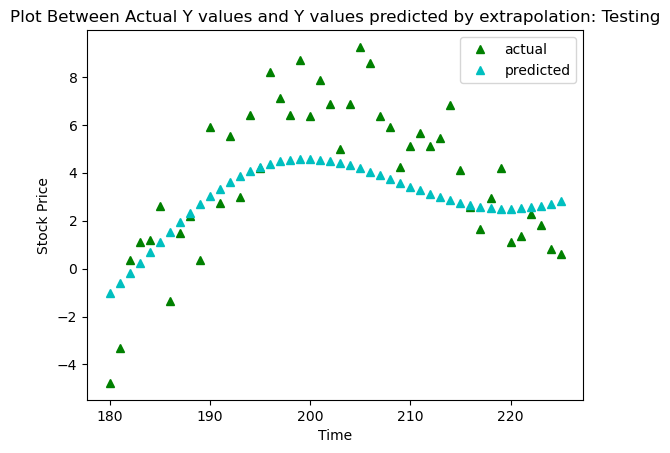

In [70]:
plt.title('Plot Between Actual Y values and Y values predicted by extrapolation: Testing')
plt.plot(x_test_sl, y_test_sl,'g^')
plt.plot(x_test_sl, y_test_pred,'c^')
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.legend(('actual','predicted'))

In [71]:
y_sl_pred=pred(x_eval_sl[0], optimal_a, optimal_k,optimal_c)
SSE(y_sl_pred,y_eval_sl)


177.49845764544

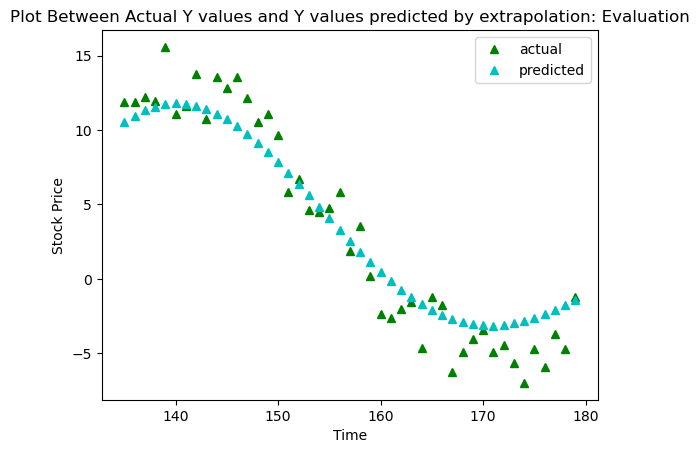

In [72]:
plt.title('Plot Between Actual Y values and Y values predicted by extrapolation: Evaluation')
plt.plot(x_eval_sl[0], y_eval_sl,'g^')
plt.plot(x_eval_sl[0], y_sl_pred,'c^')
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.legend(('actual','predicted'))

<span style="font-size:1.1em;">    
    
Our model works better for interpolation (sse_test=89.9 & sse_eval=84.8) as compared to extrapolation (sse_test=236.82 & sse_eval=177.49).
</span>